# Lab 4: Regression Analysis with Regularization Techniques
# Student Name: 	Praveen Kumar Rayapati
# Course: Advanced Big Data and Data Mining


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


STEP 1: DATA PREPARATION
Dataset shape: (442, 11)

Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Dataset description:
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measur...

Dataset Info:
Number of samples: 442
Number of features: 10
Target variable range: [25.00, 346.00]

Missing values per column:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

First 5 rows of the dataset:
        age       sex       bmi        bp    

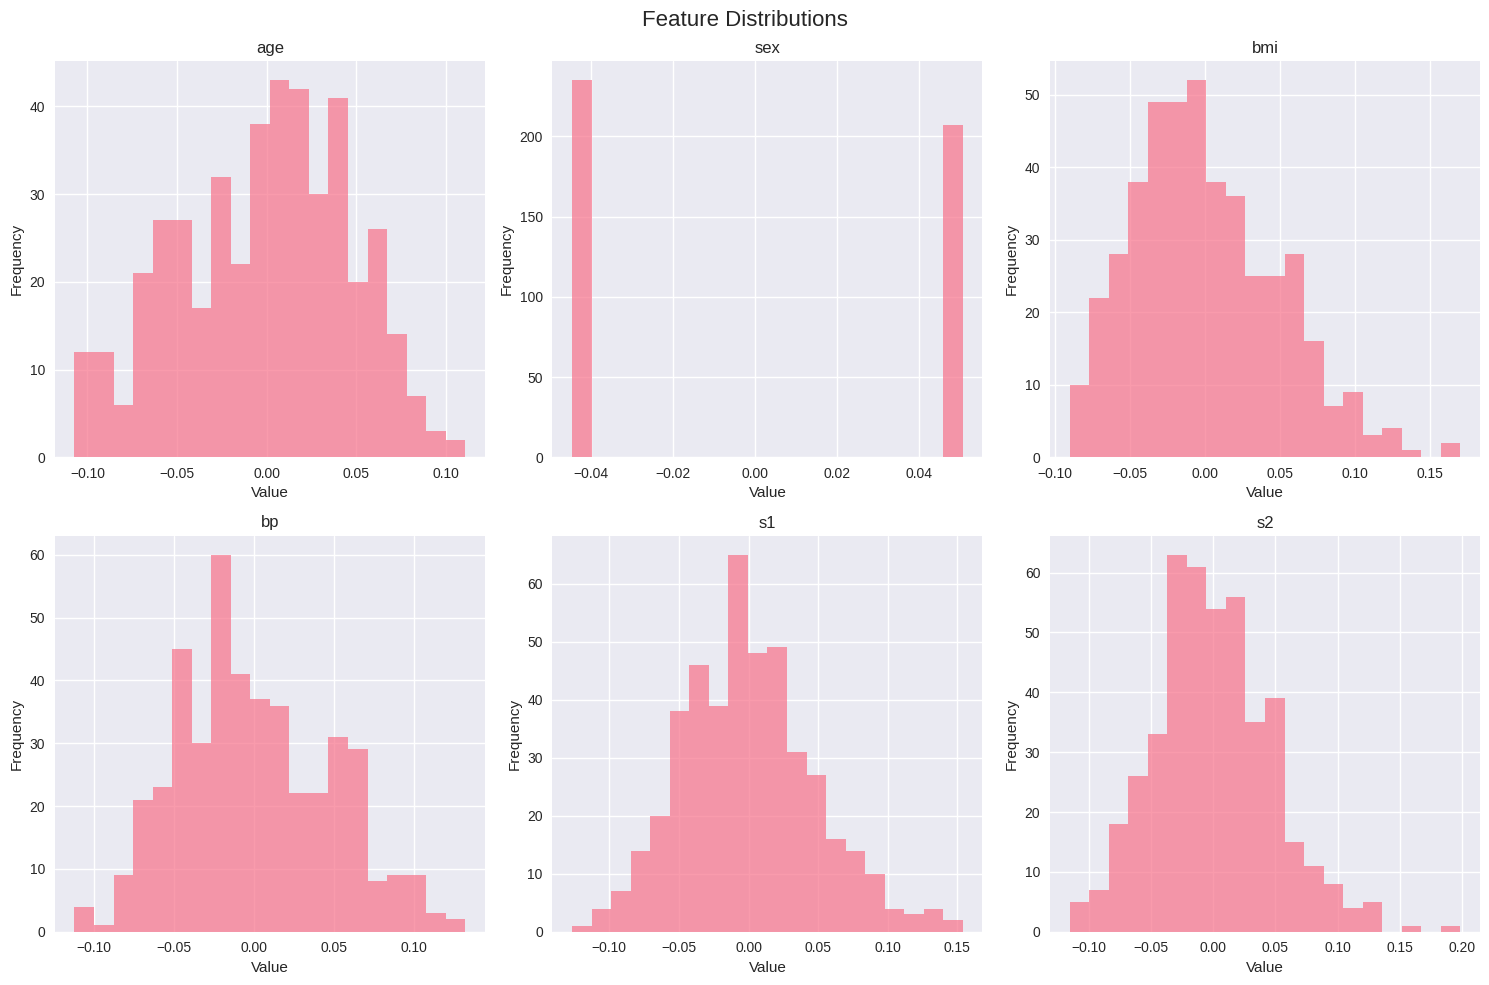

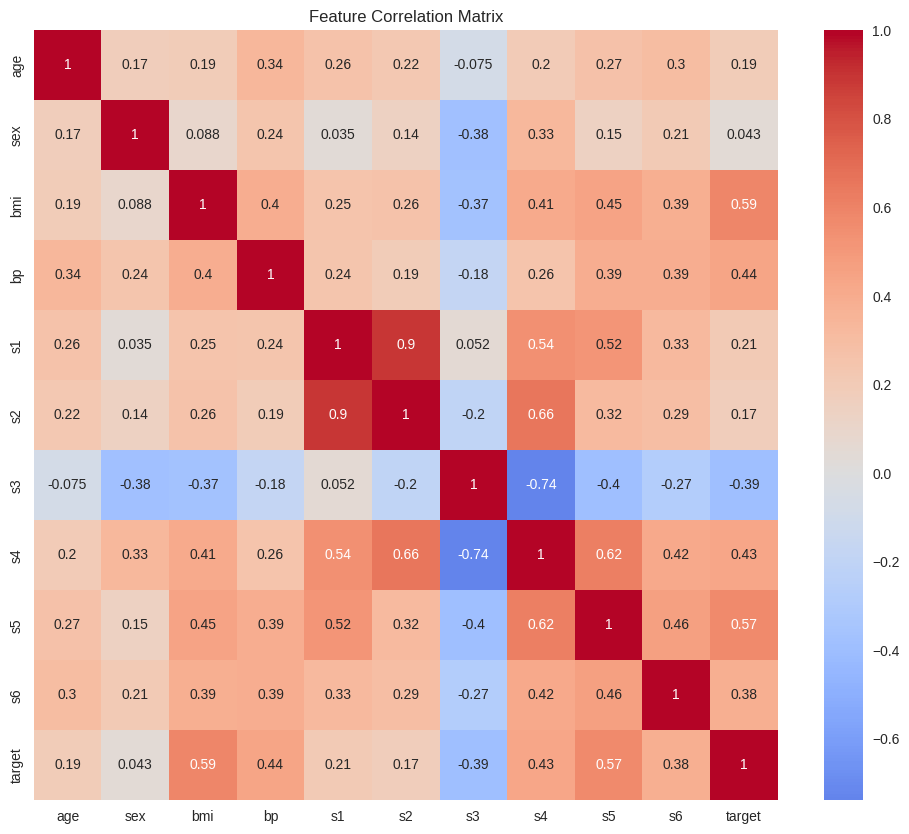

In [2]:
# =============================================================================
# STEP 1: DATA PREPARATION
# =============================================================================

print("\n" + "="*50)
print("STEP 1: DATA PREPARATION")
print("="*50)

# Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Create DataFrame for better visualization
feature_names = diabetes.feature_names
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

print(f"Dataset shape: {df.shape}")
print(f"\nFeatures: {list(feature_names)}")
print(f"\nDataset description:")
print(diabetes.DESCR[:500] + "...")

# Display basic statistics
print(f"\nDataset Info:")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Target variable range: [{y.min():.2f}, {y.max():.2f}]")

# Check for missing values
print(f"\nMissing values per column:")
print(df.isnull().sum())

# Display first few rows
print(f"\nFirst 5 rows of the dataset:")
print(df.head())

# Statistical summary
print(f"\nStatistical Summary:")
print(df.describe())

# Visualize data distribution
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Feature Distributions', fontsize=16)

for i, feature in enumerate(feature_names[:6]):
    row, col = i // 3, i % 3
    axes[row, col].hist(df[feature], bins=20, alpha=0.7)
    axes[row, col].set_title(f'{feature}')
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()


STEP 2: SIMPLE LINEAR REGRESSION
Using feature 'bmi' (correlation: 0.586)

Simple Linear Regression Performance Metrics:
MAE:  52.260
MSE:  4061.826
RMSE: 63.732
R²:   0.233


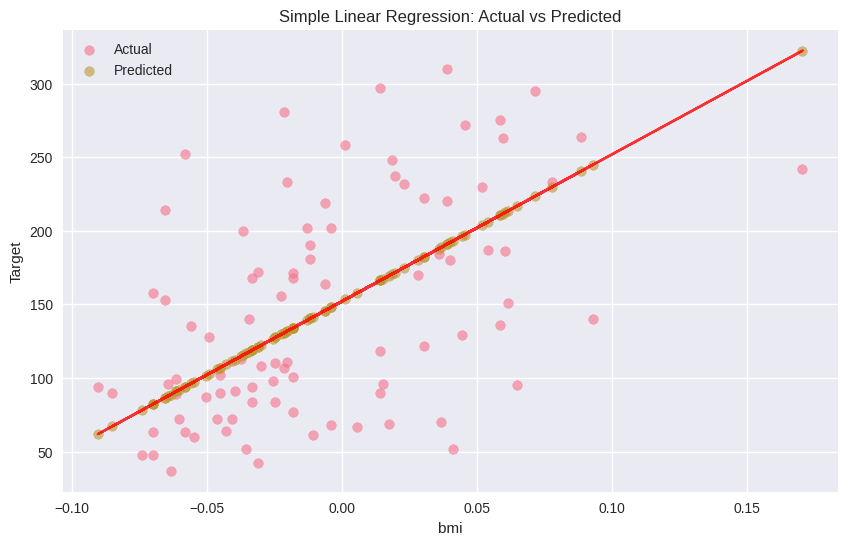

In [3]:
# =============================================================================
# STEP 2: LINEAR REGRESSION (SIMPLE)
# =============================================================================

print("\n" + "="*50)
print("STEP 2: SIMPLE LINEAR REGRESSION")
print("="*50)

# Choose the feature with highest correlation to target
correlations = df.corr()['target'].abs().sort_values(ascending=False)
best_feature = correlations.index[1]  # Skip target itself
print(f"Using feature '{best_feature}' (correlation: {correlations[best_feature]:.3f})")

# Prepare data for simple linear regression
X_simple = df[[best_feature]]
y_simple = df['target']

# Split the data
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42
)

# Train Simple Linear Regression
lr_simple = LinearRegression()
lr_simple.fit(X_train_simple, y_train_simple)

# Make predictions
y_pred_simple = lr_simple.predict(X_test_simple)

# Calculate metrics
def calculate_metrics(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{model_name} Performance Metrics:")
    print(f"MAE:  {mae:.3f}")
    print(f"MSE:  {mse:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²:   {r2:.3f}")

    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

metrics_simple = calculate_metrics(y_test_simple, y_pred_simple, "Simple Linear Regression")

# Visualize Simple Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(X_test_simple, y_test_simple, alpha=0.6, label='Actual')
plt.scatter(X_test_simple, y_pred_simple, alpha=0.6, label='Predicted')
plt.plot(X_test_simple, y_pred_simple, 'r-', alpha=0.8)
plt.xlabel(f'{best_feature}')
plt.ylabel('Target')
plt.title('Simple Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()



STEP 3: MULTIPLE REGRESSION

Multiple Linear Regression Performance Metrics:
MAE:  42.794
MSE:  2900.194
RMSE: 53.853
R²:   0.453

Feature Coefficients:
s1: -931.489
s5: 736.199
bmi: 542.429
s2: 518.062
bp: 347.704
s4: 275.318
sex: -241.964
s3: 163.420
s6: 48.671
age: 37.904


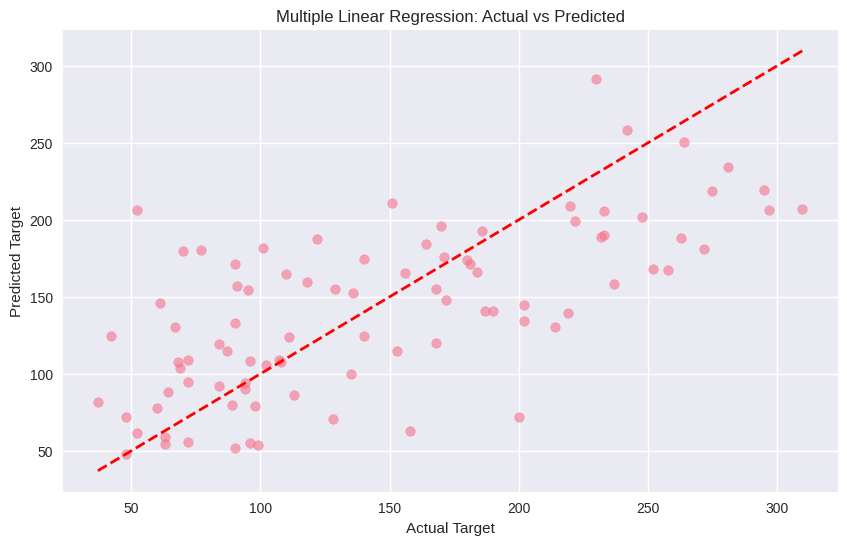

In [4]:
# =============================================================================
# STEP 3: MULTIPLE REGRESSION
# =============================================================================

print("\n" + "="*50)
print("STEP 3: MULTIPLE REGRESSION")
print("="*50)

# Use all features for multiple regression
X_multi = df.drop('target', axis=1)
y_multi = df['target']

# Split the data
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

# Train Multiple Linear Regression
lr_multi = LinearRegression()
lr_multi.fit(X_train_multi, y_train_multi)

# Make predictions
y_pred_multi = lr_multi.predict(X_test_multi)

# Calculate metrics
metrics_multi = calculate_metrics(y_test_multi, y_pred_multi, "Multiple Linear Regression")

# Feature importance (coefficients)
feature_importance = dict(zip(feature_names, lr_multi.coef_))
print(f"\nFeature Coefficients:")
for feature, coef in sorted(feature_importance.items(), key=lambda x: abs(x[1]), reverse=True):
    print(f"{feature}: {coef:.3f}")

# Visualize Multiple Regression predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test_multi, y_pred_multi, alpha=0.6)
plt.plot([y_test_multi.min(), y_test_multi.max()], [y_test_multi.min(), y_test_multi.max()], 'r--', lw=2)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.show()


STEP 4: POLYNOMIAL REGRESSION

Testing Polynomial Regression with degree 1:

Polynomial Regression (degree 1) Performance Metrics:
MAE:  42.794
MSE:  2900.194
RMSE: 53.853
R²:   0.453

Testing Polynomial Regression with degree 2:

Polynomial Regression (degree 2) Performance Metrics:
MAE:  43.582
MSE:  3096.028
RMSE: 55.642
R²:   0.416

Testing Polynomial Regression with degree 3:

Polynomial Regression (degree 3) Performance Metrics:
MAE:  164.854
MSE:  82446.048
RMSE: 287.134
R²:   -14.561

Testing Polynomial Regression with degree 4:

Polynomial Regression (degree 4) Performance Metrics:
MAE:  261.667
MSE:  146907.593
RMSE: 383.285
R²:   -26.728


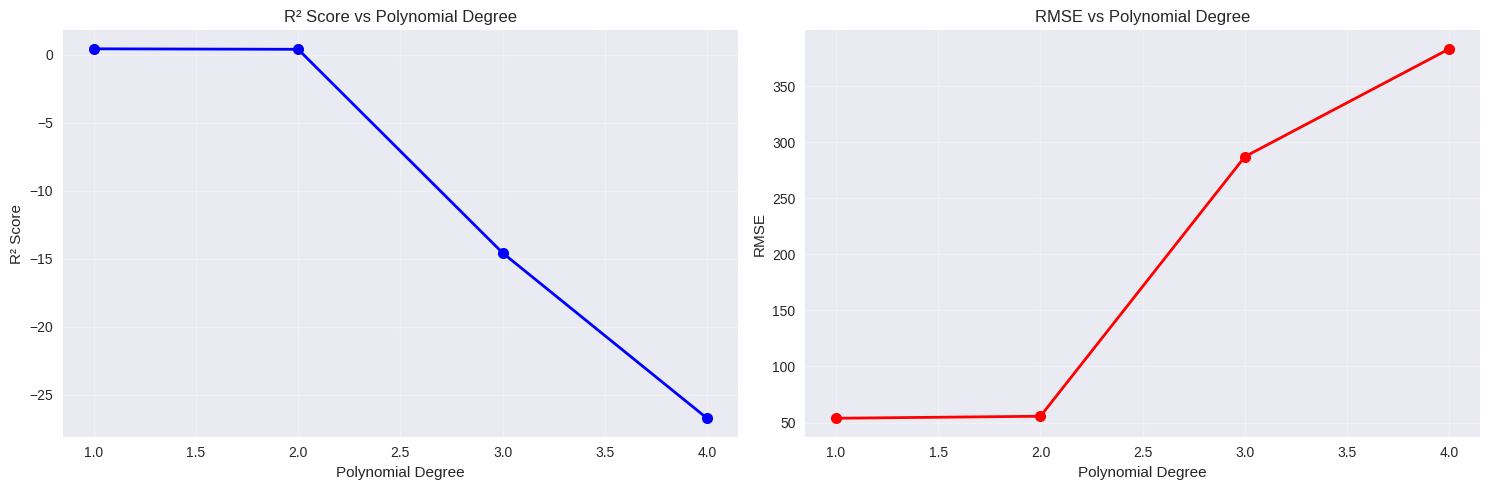

In [5]:
# =============================================================================
# STEP 4: POLYNOMIAL REGRESSION
# =============================================================================

print("\n" + "="*50)
print("STEP 4: POLYNOMIAL REGRESSION")
print("="*50)

# Test different polynomial degrees
degrees = [1, 2, 3, 4]
poly_results = {}

for degree in degrees:
    print(f"\nTesting Polynomial Regression with degree {degree}:")

    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X_multi)

    # Split data
    X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
        X_poly, y_multi, test_size=0.2, random_state=42
    )

    # Train model
    lr_poly = LinearRegression()
    lr_poly.fit(X_train_poly, y_train_poly)

    # Predictions
    y_pred_poly = lr_poly.predict(X_test_poly)

    # Store results
    metrics_poly = calculate_metrics(y_test_poly, y_pred_poly, f"Polynomial Regression (degree {degree})")
    poly_results[degree] = metrics_poly

# Visualize polynomial regression performance
degrees_list = list(poly_results.keys())
r2_scores = [poly_results[d]['R2'] for d in degrees_list]
rmse_scores = [poly_results[d]['RMSE'] for d in degrees_list]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(degrees_list, r2_scores, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Polynomial Degree')
ax1.set_ylabel('R² Score')
ax1.set_title('R² Score vs Polynomial Degree')
ax1.grid(True, alpha=0.3)

ax2.plot(degrees_list, rmse_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Polynomial Degree')
ax2.set_ylabel('RMSE')
ax2.set_title('RMSE vs Polynomial Degree')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()




STEP 5: RIDGE AND LASSO REGRESSION
Testing Ridge Regression:

Ridge (α=0.1) Performance Metrics:
MAE:  42.796
MSE:  2899.058
RMSE: 53.843
R²:   0.453

Ridge (α=1.0) Performance Metrics:
MAE:  42.812
MSE:  2892.030
RMSE: 53.778
R²:   0.454

Ridge (α=10.0) Performance Metrics:
MAE:  42.853
MSE:  2875.668
RMSE: 53.625
R²:   0.457

Ridge (α=100.0) Performance Metrics:
MAE:  43.244
MSE:  2857.361
RMSE: 53.454
R²:   0.461

Ridge (α=1000.0) Performance Metrics:
MAE:  49.776
MSE:  3450.934
RMSE: 58.745
R²:   0.349

Testing Lasso Regression:

Lasso (α=0.1) Performance Metrics:
MAE:  42.805
MSE:  2884.553
RMSE: 53.708
R²:   0.456

Lasso (α=1.0) Performance Metrics:
MAE:  42.802
MSE:  2824.101
RMSE: 53.142
R²:   0.467

Lasso (α=10.0) Performance Metrics:
MAE:  44.770
MSE:  2932.277
RMSE: 54.151
R²:   0.447

Lasso (α=100.0) Performance Metrics:
MAE:  64.006
MSE:  5361.533
RMSE: 73.222
R²:   -0.012

Lasso (α=1000.0) Performance Metrics:
MAE:  64.006
MSE:  5361.533
RMSE: 73.222
R²:   -0.012


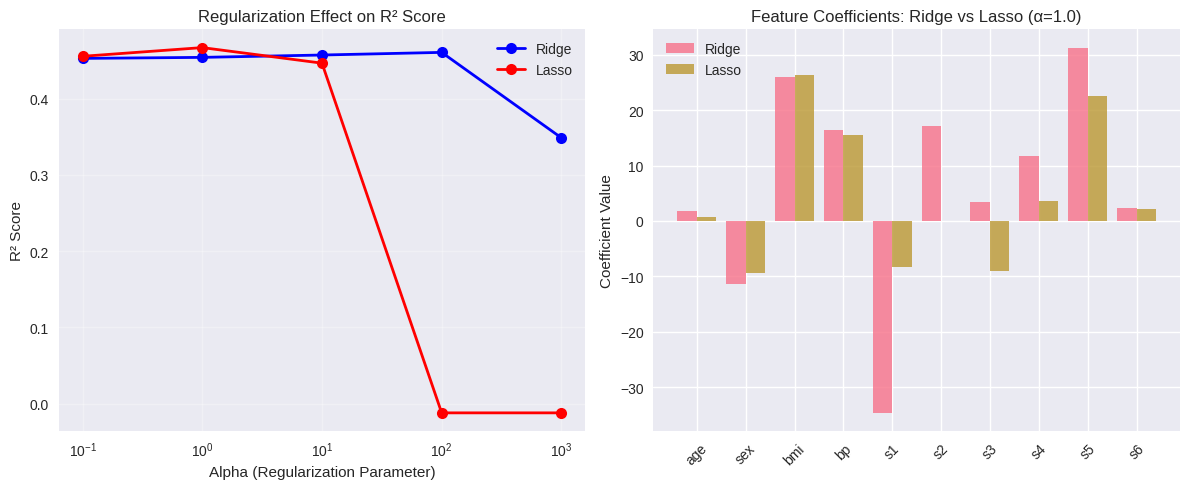

In [6]:
# =============================================================================
# STEP 5: REGULARIZATION (RIDGE AND LASSO)
# =============================================================================

print("\n" + "="*50)
print("STEP 5: RIDGE AND LASSO REGRESSION")
print("="*50)

# Standardize features for regularization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_multi)

# Split scaled data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled, y_multi, test_size=0.2, random_state=42
)

# Test different alpha values
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0]
ridge_results = {}
lasso_results = {}

print("Testing Ridge Regression:")
for alpha in alphas:
    # Ridge Regression
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train_scaled)
    y_pred_ridge = ridge.predict(X_test_scaled)

    metrics_ridge = calculate_metrics(y_test_scaled, y_pred_ridge, f"Ridge (α={alpha})")
    ridge_results[alpha] = metrics_ridge

print("\nTesting Lasso Regression:")
for alpha in alphas:
    # Lasso Regression
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_scaled, y_train_scaled)
    y_pred_lasso = lasso.predict(X_test_scaled)

    metrics_lasso = calculate_metrics(y_test_scaled, y_pred_lasso, f"Lasso (α={alpha})")
    lasso_results[alpha] = metrics_lasso

# Visualize regularization effects
ridge_r2 = [ridge_results[a]['R2'] for a in alphas]
lasso_r2 = [lasso_results[a]['R2'] for a in alphas]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.semilogx(alphas, ridge_r2, 'bo-', label='Ridge', linewidth=2, markersize=8)
plt.semilogx(alphas, lasso_r2, 'ro-', label='Lasso', linewidth=2, markersize=8)
plt.xlabel('Alpha (Regularization Parameter)')
plt.ylabel('R² Score')
plt.title('Regularization Effect on R² Score')
plt.legend()
plt.grid(True, alpha=0.3)

# Feature coefficients comparison
plt.subplot(1, 2, 2)
ridge_best = Ridge(alpha=1.0)
lasso_best = Lasso(alpha=1.0, max_iter=10000)
ridge_best.fit(X_train_scaled, y_train_scaled)
lasso_best.fit(X_train_scaled, y_train_scaled)

x_pos = np.arange(len(feature_names))
plt.bar(x_pos - 0.2, ridge_best.coef_, 0.4, label='Ridge', alpha=0.8)
plt.bar(x_pos + 0.2, lasso_best.coef_, 0.4, label='Lasso', alpha=0.8)
plt.xticks(x_pos, feature_names, rotation=45)
plt.ylabel('Coefficient Value')
plt.title('Feature Coefficients: Ridge vs Lasso (α=1.0)')
plt.legend()
plt.tight_layout()
plt.show()



STEP 6: MODEL COMPARISON AND ANALYSIS

Model Comparison Summary:
                        MAE        MSE     RMSE      R2
Simple Linear        52.260   4061.826   63.732   0.233
Multiple Linear      42.794   2900.194   53.853   0.453
Polynomial (deg=2)   43.582   3096.028   55.642   0.416
Polynomial (deg=3)  164.854  82446.048  287.134 -14.561
Ridge (α=1.0)        42.812   2892.030   53.778   0.454
Lasso (α=1.0)        42.802   2824.101   53.142   0.467


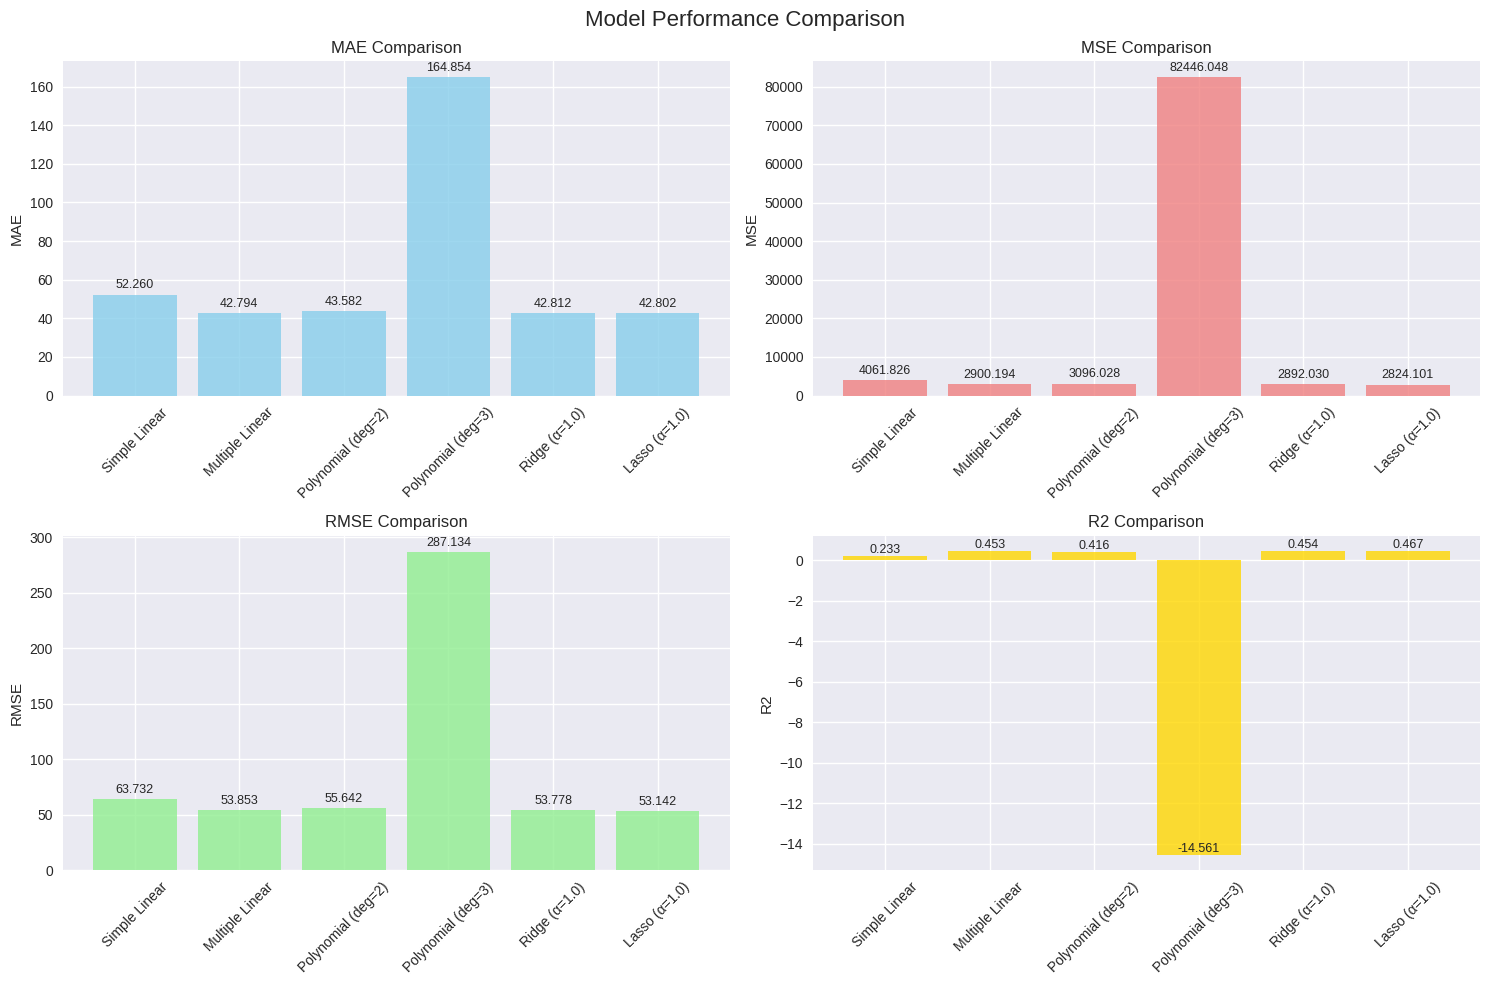

In [7]:
# =============================================================================
# STEP 6: MODEL COMPARISON AND ANALYSIS
# =============================================================================

print("\n" + "="*60)
print("STEP 6: MODEL COMPARISON AND ANALYSIS")
print("="*60)

# Compile all results
all_results = {
    'Simple Linear': metrics_simple,
    'Multiple Linear': metrics_multi,
    'Polynomial (deg=2)': poly_results[2],
    'Polynomial (deg=3)': poly_results[3],
    'Ridge (α=1.0)': ridge_results[1.0],
    'Lasso (α=1.0)': lasso_results[1.0]
}

# Create comparison DataFrame
comparison_df = pd.DataFrame(all_results).T
print("\nModel Comparison Summary:")
print(comparison_df.round(3))

# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Model Performance Comparison', fontsize=16)

metrics_to_plot = ['MAE', 'MSE', 'RMSE', 'R2']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

for i, metric in enumerate(metrics_to_plot):
    row, col = i // 2, i % 2
    values = comparison_df[metric].values
    models = comparison_df.index

    bars = axes[row, col].bar(models, values, color=colors[i], alpha=0.8)
    axes[row, col].set_title(f'{metric} Comparison')
    axes[row, col].set_ylabel(metric)
    axes[row, col].tick_params(axis='x', rotation=45)

    # Add value labels on bars
    for bar, value in zip(bars, values):
        axes[row, col].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01*max(values),
                           f'{value:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Find best performing model
best_model_r2 = comparison_df['R2'].idxmax()
best_model_rmse = comparison_df['RMSE'].idxmin()